Text(0, 0.5, 'y')

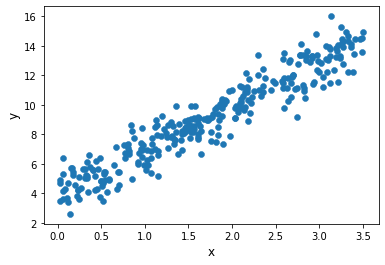

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Generating linear data

X = 3.5 * np.random.rand(300, 1)
y = 4 + 3 * X + np.random.randn(300, 1)

plt.scatter(X, y, linewidth=0.5)
plt.xlabel("x", fontsize = "12")
plt.ylabel("y", fontsize = "12")

In [5]:
## Computing our parameter theta using the normal equation.

print(len(X), len(y))

#Add bias term in X for all 300 instances
X_train = np.c_[np.ones((300,1)), X]
print(X_train[:10])

300 300
[[1.         3.02123218]
 [1.         2.58412147]
 [1.         2.07386431]
 [1.         2.03703457]
 [1.         0.54127235]
 [1.         2.24919992]
 [1.         2.59759362]
 [1.         1.9824675 ]
 [1.         0.11293985]
 [1.         2.21937394]]


In [6]:
theta_optimal = np.linalg.inv(X_train.transpose()@(X_train))@(X_train.transpose())@(y)

In [7]:
theta_optimal

array([[3.98245087],
       [2.9640341 ]])

In [8]:
#Making predictions using theta_optimal
X_new = np.array([[0.13],[3.49]])
X_new_bias = np.c_[np.ones(theta_optimal.shape), X_new]

print("Theta dimensions: ", theta_optimal.shape)
print("X dimensions: ", X_new_bias.shape)
print(X_new_bias)

y_prediction = X_new_bias @ theta_optimal
print("\n\nPredictions\n", y_prediction)

Theta dimensions:  (2, 1)
X dimensions:  (2, 2)
[[1.   0.13]
 [1.   3.49]]


Predictions
 [[ 4.3677753 ]
 [14.32692987]]


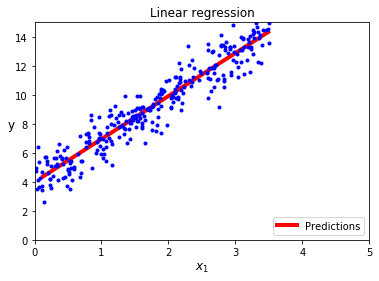

In [9]:
plt.plot(X_new, y_prediction, "r-", linewidth ="4", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0,5,0,15])
plt.title("Linear regression")
plt.legend(loc="lower right")
plt.xlabel("$x_1$", fontsize = 12)
plt.ylabel("y", rotation = 0, fontsize = 12)
plt.show()

## Using Linear Regression from Scikit-Learn

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X, y)

In [11]:
print(model.coef_, model.intercept_) #Similar to our calculation from the normal equation

[[2.9640341]] [3.98245087]


In [12]:
#Prediction on our new data points
model.predict(X_new)

array([[ 4.3677753 ],
       [14.32692987]])

In [13]:
#Another way of calculating optimal theta. 
#LinearRegression is based on np.linalg.lstsq

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, y, rcond=1e-6)
theta_best_svd

array([[3.98245087],
       [2.9640341 ]])

In [14]:
#Another way of calculating optimal theta. 
np.linalg.pinv(X_train)@y

array([[3.98245087],
       [2.9640341 ]])

## Batch Gradient Descent implementation

In [15]:
def gradient_calculation(alpha, m):
    theta = np.random.randn(2,1)
    for i in range(0,1000):
        gradient = (2/m) * (X_train.transpose() @ (X_train @ theta - y))
        theta = theta - alpha * gradient
    return theta

In [16]:
gradient_calculation(0.03, 300)

array([[3.98244241],
       [2.964038  ]])

In [17]:
#Trying out for different learning rate values

m = 300 #Training set size
alpha_variations = [0.0001, 0.02, 0.1, 0.21]
theta_gradients = []
for alpha in alpha_variations:
    theta_gradients.append(gradient_calculation(alpha, m))
    

In [210]:
theta_gradients

[array([[1.91222905],
        [1.62963222]]),
 array([[3.88553163],
        [3.0698543 ]]),
 array([[3.88598405],
        [3.06964842]]),
 array([[ -6.99842505],
        [-20.8491856 ]])]

In [211]:
#Predicting with the different theta values
def predict_value(X_new_bias, theta):
    return X_new_bias @ theta

[[2.12408124]
 [7.59964548]]
[[ 4.28461269]
 [14.59932313]]
[[ 4.28503834]
 [14.59905704]]
[[ -9.70881918]
 [-79.7620828 ]]


[0, 5, -80, 15]

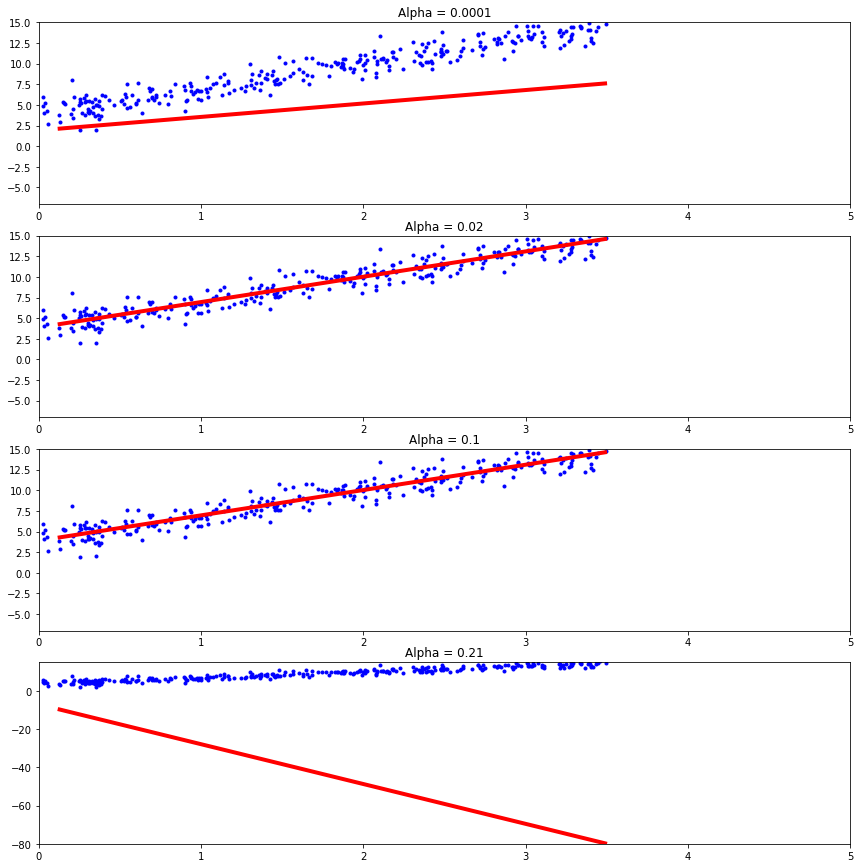

In [219]:
#Plotting to understand how the different alphas affect the convergence and best-fit line
fig, axs=plt.subplots(4,1, figsize=(12,12))
fig.tight_layout()
for i in range(len(alpha_variations)):
    axs[i].plot(X, y, "b.", linewidth ="2", label="Predictions")
    axs[i].set_title("Alpha = " + str(alpha_variations[i]))
    y_prediction = predict_value(X_new_bias, theta_gradients[i])
    print(y_prediction)
    axs[i].plot(X_new, y_prediction, "r-", linewidth ="4", label="Predictions")
    axs[i].axis([0,5,-7,15])

#y_prediction[3] varies a lot from the rest
#Creating a different axis for display purposes.

axs[3].axis([0,5,-80,15])

## Stochastic Gradient Descent implementation

In [36]:
#SGD implementation with a learning schedule. 
#Gradually decrease the learning rate per iteration to reach an optimal global minimum

n_epochs = 50

#Playing around with a combo of hyperparameters and see the theta values.
#50 values of to,t1
t_pairs = []
for t0 in range(5,25,5):
    for t1 in range(25,50,5):
        t_pairs.append((t0,t1))
print(t_pairs)       
def learning_schedule(t,t0,t1):
    return t0/ (t+t1)

theta = np.random.randn(2,1)
all_theta = []
for t0,t1 in t_pairs:
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_train[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T@(xi@theta - yi)
            eta = learning_schedule(epoch * m + i, t0, t1)
            theta = theta - eta * gradients
    all_theta.append(theta)

[(5, 25), (5, 30), (5, 35), (5, 40), (5, 45), (10, 25), (10, 30), (10, 35), (10, 40), (10, 45), (15, 25), (15, 30), (15, 35), (15, 40), (15, 45), (20, 25), (20, 30), (20, 35), (20, 40), (20, 45)]


In [37]:
all_theta

[array([[3.93544872],
        [2.9682618 ]]),
 array([[3.98946266],
        [2.94745704]]),
 array([[3.97859837],
        [2.96545766]]),
 array([[3.94911871],
        [2.97265895]]),
 array([[3.98882023],
        [2.99191722]]),
 array([[3.97308613],
        [2.94621877]]),
 array([[3.9692672],
        [2.976002 ]]),
 array([[3.95670408],
        [2.97333348]]),
 array([[3.99432096],
        [3.03213801]]),
 array([[3.99736245],
        [2.99004672]]),
 array([[2.60607047],
        [3.58536488]]),
 array([[4.00569766],
        [2.93565302]]),
 array([[4.03500772],
        [2.91515652]]),
 array([[3.990069  ],
        [2.95281958]]),
 array([[3.94344211],
        [2.97075921]]),
 array([[4.02980657],
        [2.98798848]]),
 array([[3.90337065],
        [2.95965356]]),
 array([[4.0612659 ],
        [2.94331794]]),
 array([[4.02258522],
        [2.91355315]]),
 array([[3.9593584],
        [2.914857 ]])]